In [1]:
# set up
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [4]:
from tensorflow import keras
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.mnist.load_data()
# split tran full to train and validation, 
# scale inetsitas pixel down to the 0-1 range by dividing 255 (0-255 rgb value)

X_valid,X_train = X_train_full[:5000] /255, X_train_full[5000:] /255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255
 
 

In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(55000, 28, 28)
(10000, 28, 28)
(5000, 28, 28)


In [6]:
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(55000,)
(10000,)
(5000,)


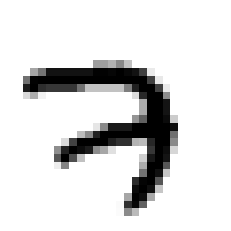

In [8]:
# plot sample data on train data
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [11]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

# data label terdiri dari sebuah visual image 1-10 

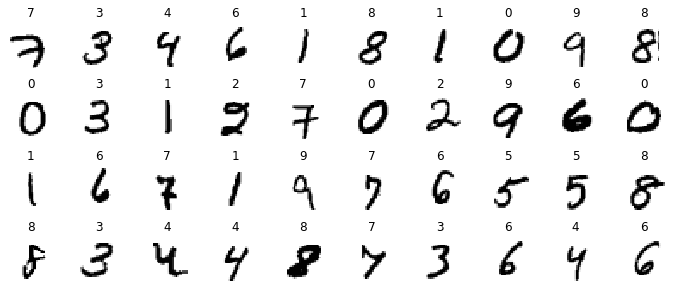

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off'),
        plt.title(y_train[index],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# Growth the learning rate

In [72]:
K = keras.backend
# custom callbacks
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self,batch,logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)


In [69]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model_LR = model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_LR.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),# baseline 1e-3(1x10^-3)
              metrics=["accuracy"])
#defining object of class
expon_LR = ExponentialLearningRate(factor=1.005)

In [75]:
# train model on 1 epochs
history_LR = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_LR])

1719/1719 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6162 - val_loss: nan - val_accuracy: 0.0958


# plot EDA the loss as functional the learning rate

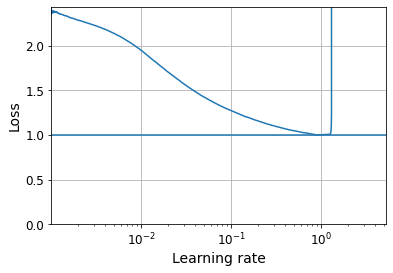

In [89]:
plt.plot(expon_LR.rates,expon_LR.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_LR.losses),min(expon_LR.rates),max(expon_LR.rates))
plt.axis([min(expon_LR.rates),max(expon_LR.rates),0,expon_LR.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

dilihat dari EDA graphics diatas bahwa data pada 6e-1 tidak mengalami penurunan loss function gradient di ikuti oleh 4e-1 penurunan pada nilai konstan alias sama pada penurunan 2e-1 menuju ke 3e-1 maka dari itu

Learning rate yang digunakan adalah 3e-1

In [85]:
expon_LR.losses

[2.4387221336364746,
 2.379401445388794,
 2.3607571125030518,
 2.4021825790405273,
 2.3848319053649902,
 2.3894498348236084,
 2.394338846206665,
 2.3778090476989746,
 2.374163866043091,
 2.373161554336548,
 2.3689522743225098,
 2.3784468173980713,
 2.379854917526245,
 2.3868346214294434,
 2.3861193656921387,
 2.3922741413116455,
 2.385532855987549,
 2.3808488845825195,
 2.3784544467926025,
 2.3801355361938477,
 2.385160207748413,
 2.3796255588531494,
 2.3764760494232178,
 2.3784866333007812,
 2.3805904388427734,
 2.3791139125823975,
 2.380636692047119,
 2.380760908126831,
 2.379504442214966,
 2.3762805461883545,
 2.379870653152466,
 2.3752756118774414,
 2.3721680641174316,
 2.3707101345062256,
 2.367997884750366,
 2.36619234085083,
 2.3662073612213135,
 2.3665127754211426,
 2.3644208908081055,
 2.3664145469665527,
 2.364853620529175,
 2.3621301651000977,
 2.3594515323638916,
 2.3589282035827637,
 2.3576102256774902,
 2.3563995361328125,
 2.357508659362793,
 2.356372594833374,
 2.356752

In [86]:
expon_LR.rates

[0.001,
 0.0010050001,
 0.001010025,
 0.0010150751,
 0.0010201505,
 0.0010252512,
 0.0010303775,
 0.0010355293,
 0.001040707,
 0.0010459105,
 0.00105114,
 0.0010563957,
 0.0010616777,
 0.0010669861,
 0.0010723211,
 0.0010776827,
 0.0010830711,
 0.0010884865,
 0.0010939289,
 0.0010993986,
 0.0011048956,
 0.0011104201,
 0.0011159722,
 0.0011215521,
 0.0011271598,
 0.0011327956,
 0.0011384595,
 0.0011441518,
 0.0011498726,
 0.001155622,
 0.0011614001,
 0.0011672071,
 0.0011730432,
 0.0011789084,
 0.001184803,
 0.001190727,
 0.0011966806,
 0.001202664,
 0.0012086773,
 0.0012147207,
 0.0012207943,
 0.0012268983,
 0.0012330328,
 0.0012391979,
 0.0012453939,
 0.0012516208,
 0.001257879,
 0.0012641683,
 0.0012704892,
 0.0012768416,
 0.0012832258,
 0.001289642,
 0.0012960902,
 0.0013025707,
 0.0013090835,
 0.001315629,
 0.0013222072,
 0.0013288182,
 0.0013354622,
 0.0013421396,
 0.0013488502,
 0.0013555945,
 0.0013623724,
 0.0013691842,
 0.0013760302,
 0.0013829103,
 0.0013898248,
 0.0013967738

In [87]:
expon_LR.factor

1.005

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),#28 X 28 greyscale pixels
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [45]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate = 3e-1),
              metrics=["accuracy",recall_m,precision_m,f1_m])

In [20]:
# create tensorboard
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir,"my_mnist_logs","run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5",save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history1 = model.fit(X_train,y_train,epochs=100,
                     validation_data = [X_valid,y_valid],
                     callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 4.8401e-05 - accuracy: 1.0000 - recall_m: 1.0000 - precision_m: 0.9010 - f1_m: 0.9471 - val_loss: 0.0927 - val_accuracy: 0.9870 - val_recall_m: 1.0100 - val_precision_m: 0.9138 - val_f1_m: 0.9588
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 4.2529e-05 - accuracy: 1.0000 - recall_m: 1.0000 - precision_m: 0.9010 - f1_m: 0.9471 - val_loss: 0.0934 - val_accuracy: 0.9874 - val_recall_m: 1.0100 - val_precision_m: 0.9138 - val_f1_m: 0.9588
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 3.8319e-05 - accuracy: 1.0000 - recall_m: 1.0000 - precision_m: 0.9010 - f1_m: 0.9471 - val_loss: 0.0940 - val_accuracy: 0.9874 - val_recall_m: 1.0094 - val_precision_m: 0.9130 - val_f1_m: 0.9581
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 3.4979e-05 - accuracy: 1.0000 - recall_m: 1.0000 - precision_m: 0.9010 - f1_m: 0.9471 - val_loss: 0.0946

In [53]:
#roll backs best model
model = keras.models.load_model("my_mnist_model.h5",custom_objects={"recall_m":recall_m,"precision_m":precision_m,"f1_m":f1_m})
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0977 - accuracy: 0.9840 - recall_m: 1.0125 - precision_m: 0.9138 - f1_m: 0.9599


[0.097712442278862,
 0.984000027179718,
 1.0124679803848267,
 0.9138217568397522,
 0.9599399566650391]

# good we have 98 % accuracy 
# loss 9.77 %
# recal : 101.25 % -> Tp / (Tp + Fn)
# precision : 91 % -> Tp / (Tp + Fp)
# f1 score : 2 x (precision x recal) / (precision + recal) => 95 %

In [54]:
# visualisasi the model 
%tensorboard --logdir =./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.


In [58]:
X_new = X_test[:3]
y_predict=model.predict(X_new)
y_predict=np.argmax(y_predict,axis=1)
y_predict

1/1 [==============================] - 0s 14ms/step


array([7, 2, 1], dtype=int64)

In [66]:
class_name=[0,1,2,3,4,5,6,7,8,9]

In [67]:
np.array(class_name)[y_predict]

array([7, 2, 1])